<a href="https://colab.research.google.com/github/somyakmukherjee/Exploratory-Data-Analysis-on-Global-Terrorism/blob/main/Capstone_Project_Global_terrorism_EDA_by_Somyak_Mukherjee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Expolatory Data Analysis on Global Terrorism Database**
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.



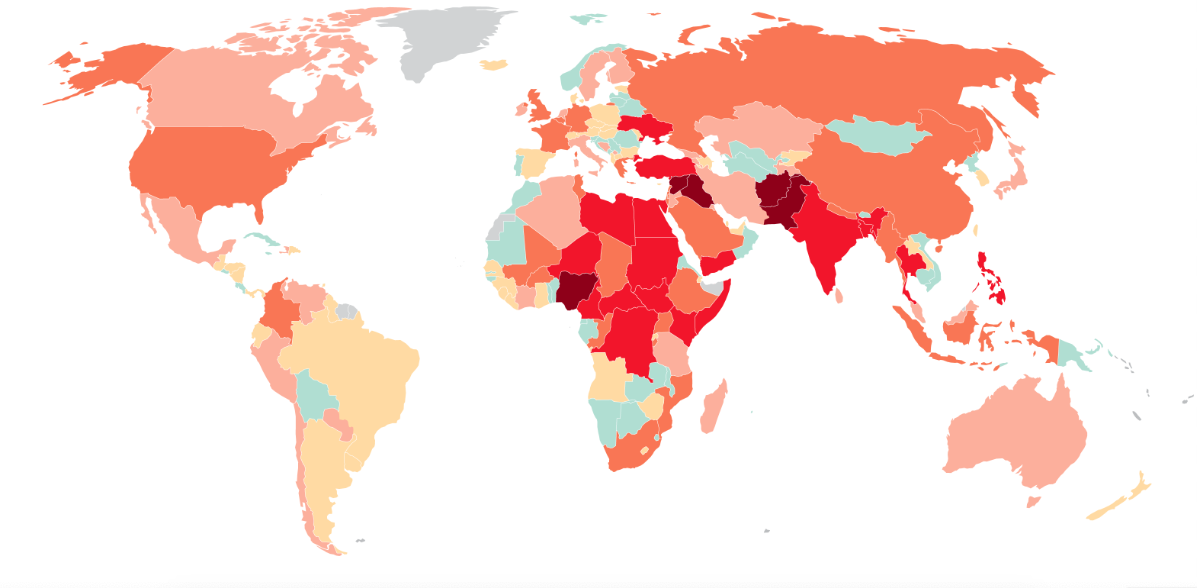

**This EDA project is made by Abhijeeth Vhavle, Danish Zia & Somyak Mukherjee**

# **GitHub Link -** 
https://github.com/somyakmukherjee/Exploratory-Data-Analysis-on-Global-Terrorism

# **Explore and analyze the data to discover key findings pertaining to terrorist activities.**

**Importing Dataset and library**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import math
from wordcloud import WordCloud
from google.colab import drive

In [ ]:
# Mount drive
drive.mount('/content/drive')

# Retrieve data from csv file
filepath = '/content/drive/MyDrive/Global_Terrorism_Data.csv'
globa_terr_data = pd.read_csv(filepath, low_memory=False)

# Create dataframe
gt_df = pd.DataFrame(globa_terr_data)

**Understanding of Data**

In [3]:
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
gt_df.shape

(181691, 135)

In [ ]:
list(gt_df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [ ]:
gt_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


**Finding the percentage of missing values columns wise**

In [4]:
#To get the percentage of null values each column wise
missingvalues_percentage = gt_df.isna().sum().sort_values(ascending= False)/len(gt_df)
missingvalues_percentage

gsubname3           0.999890
weapsubtype4_txt    0.999615
weapsubtype4        0.999615
weaptype4           0.999598
weaptype4_txt       0.999598
                      ...   
suicide             0.000000
success             0.000000
crit3               0.000000
property            0.000000
eventid             0.000000
Length: 135, dtype: float64

**Data Cleaning**

In [5]:
# Finding the columns that have more than 15% missing values
drop_columns_list = list(missingvalues_percentage[missingvalues_percentage>0.15].index.values)
drop_columns_list

['gsubname3',
 'weapsubtype4_txt',
 'weapsubtype4',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3_txt',
 'natlty3',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3_txt',
 'weapsubtype3',
 'weaptype3_txt',
 'weaptype3',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome_txt',
 'hostkidoutcome',
 'target2',
 'targtype2_txt',
 'targtype2',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode_txt',
 'claimmode',
 'rela

In [6]:
# Dropping the Missing value columns from the data set
gt_df.drop(drop_columns_list,inplace=True,axis=1)
gt_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [7]:
gt_df.shape

(181691, 47)

In [8]:
# Exploring the remaining columns data for missing values
missingvalues_percentage = gt_df.isna().sum().sort_values(ascending= False)/len(gt_df) #To get the percentage of null values each column wise
missingvalues_percentage

weapsubtype1        0.114304
weapsubtype1_txt    0.114304
nwound              0.089773
targsubtype1_txt    0.057091
targsubtype1        0.057091
nkill               0.056761
longitude           0.025081
latitude            0.025076
natlty1             0.008581
natlty1_txt         0.008581
target1             0.003500
city                0.002389
provstate           0.002317
guncertain1         0.002091
ishostkid           0.000980
specificity         0.000033
doubtterr           0.000006
multiple            0.000006
individual          0.000000
INT_MISC            0.000000
gname               0.000000
weaptype1_txt       0.000000
weaptype1           0.000000
property            0.000000
INT_IDEO            0.000000
INT_LOG             0.000000
dbsource            0.000000
eventid             0.000000
attacktype1_txt     0.000000
targtype1_txt       0.000000
targtype1           0.000000
imonth              0.000000
iday                0.000000
extended            0.000000
country       

We will analyse following set of columns for our analysis:

Year, Month, Country, Region, State, City, ishostkid, Successs, Nationality of victim, Attack type, Target type, Weapon type, Kills, nwound, Gang name.

In [9]:
gt_df.drop(columns={'eventid','extended','iday','country','targsubtype1','region','weaptype1','weapsubtype1','specificity',
                             'vicinity','crit1','crit2','crit3','doubtterr','multiple','suicide','attacktype1','targtype1','targsubtype1_txt'
                             ,'target1','natlty1_txt','guncertain1','individual','weapsubtype1_txt','property','dbsource','INT_LOG','INT_IDEO',
                             'INT_MISC','INT_ANY'},inplace=True,axis=1)

In [10]:
gt_df.shape

(181691, 17)

In [11]:
gt_df.head()

,iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1,gname,weaptype1_txt,nkill,nwound,ishostkid
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,MANO-D,Unknown,1.0,0.0,0.0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,23rd of September Communist League,Unknown,0.0,0.0,1.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,Unknown,Unknown,1.0,0.0,0.0
3,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,Unknown,Explosives,NaN,NaN,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,Unknown,Incendiary,NaN,NaN,0.0


# **Data Manipulation & Handling Missing Values :**

In [12]:
gt_df.rename(columns={'iyear':'Year','imonth':'Month','country_txt':'Country','region_txt':'Region',
                     'provstate':'State','city':'City','latitude':'latitude','longitude':'longitude','success':'Success',
                     'attacktype1_txt':'Attacktype','targtype1_txt':'Target_type','targsubtype1_txt':'Target_subtype',
                     'gname':'Gang_name','weaptype1_txt':'Weapontype','nkill':'Kills', 'nwound':'Wounds'},inplace=True)

In [ ]:
gt_df.columns

Index(['Year', 'Month', 'Country', 'Region', 'State', 'City', 'latitude',
       'longitude', 'Success', 'Attacktype', 'Target_type', 'natlty1',
       'Gang_name', 'Weapontype', 'Kills', 'Wounds', 'ishostkid'],
      dtype='object')

In [ ]:
gt_df.shape

(181691, 17)

In [13]:
gt_df['State']= gt_df['State'].fillna('Unknown')
gt_df['City']=gt_df['City'].fillna('Unknown')
gt_df['Target_type']= gt_df['Target_type'].fillna("Others")
gt_df['Kills']=gt_df['Kills'].fillna(0)
gt_df['Wounds']=gt_df['Wounds'].fillna(0)
gt_df['victims']=gt_df['Kills']+gt_df['Wounds']

In [14]:
gt_df.head()

,Year,Month,Country,Region,State,City,latitude,longitude,Success,Attacktype,Target_type,natlty1,Gang_name,Weapontype,Kills,Wounds,ishostkid,victims
0,1970,7,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,MANO-D,Unknown,1.0,0.0,0.0,1.0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,23rd of September Communist League,Unknown,0.0,0.0,1.0,0.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,Unknown,Unknown,1.0,0.0,0.0,1.0
3,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,Unknown,Explosives,0.0,0.0,0.0,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,Unknown,Incendiary,0.0,0.0,0.0,0.0


# **General Analysis**

In [ ]:
print("Country with most attacks: ",gt_df["Country"].value_counts().idxmax())
print("City with most attacks: ",gt_df["City"].value_counts().index[1])
print("Region with most attacks: ",gt_df["Region"].value_counts().idxmax())
print("Year with most attacks: ",gt_df["Year"].value_counts().idxmax())
print("Month with most attacks: ",gt_df["Month"].value_counts().idxmax())
print("Group with most attacks: ",gt_df["Gang_name"].value_counts().index[1])
print("Most Attack Types: ",gt_df["Attacktype"].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with most attacks:  Middle East & North Africa
Year with most attacks:  2014
Month with most attacks:  5
Group with most attacks:  Taliban
Most Attack Types:  Bombing/Explosion


# **Exploratory Data Analysis**

## **1) Attack Types or Methods Analysis**

Here we will explore the different types of attacks used by Terrorists & how they spread the terror by employing different attack methods like explosion, armed assault, assassination or hijacking.

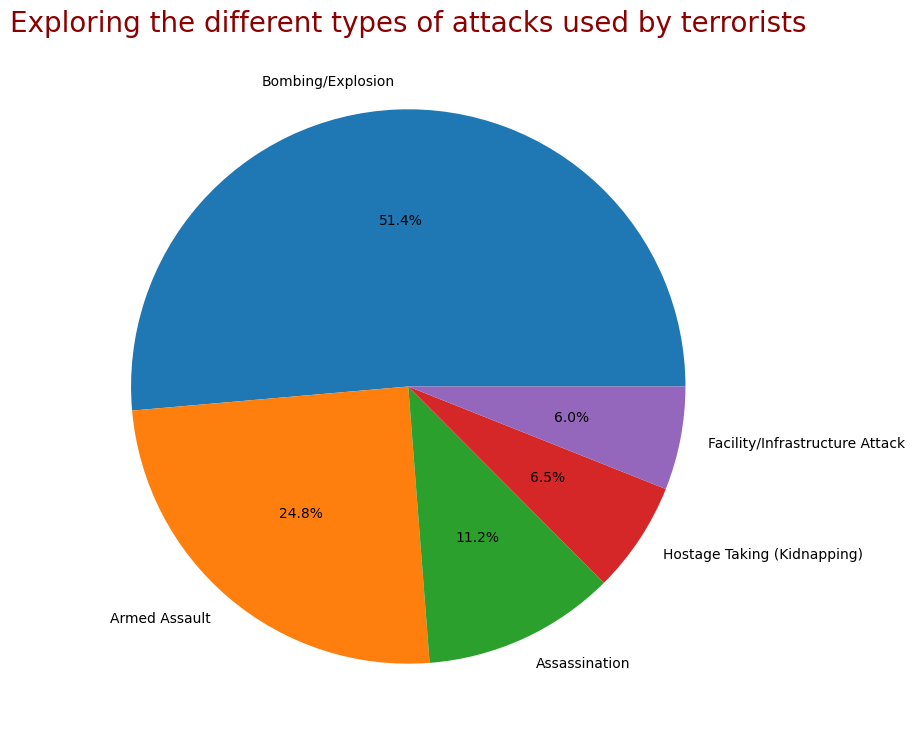

In [16]:
# Pie Plot of AttackTypes
plt.figure(figsize=(10,9))
df = gt_df['Attacktype'].value_counts().head(5)
plt.pie(df, labels=df.index, autopct='%1.1f%%')
plt.title("Exploring the different types of attacks used by terrorists",fontsize=20,color='Darkred')
plt.show()

Observations :

As we can see from above pie chart that the terrorists used bombs or explosions as their favourite type of attack. Nearly 50% (48.6) attacks are made by using explosions. This is followed by Armed Assault (23.5%) & Assassination (10.6%). 

## **2) Target Analysis**

Here we will explore the different types of targets which were chosen by terrorist to spread their terror activities. We will see the most favourite targets of terrorists. 

In [ ]:
# Percentage of Target type in overall targets
(gt_df['Target_type'].value_counts().head(10)/gt_df.shape[0])*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_type, dtype: float64

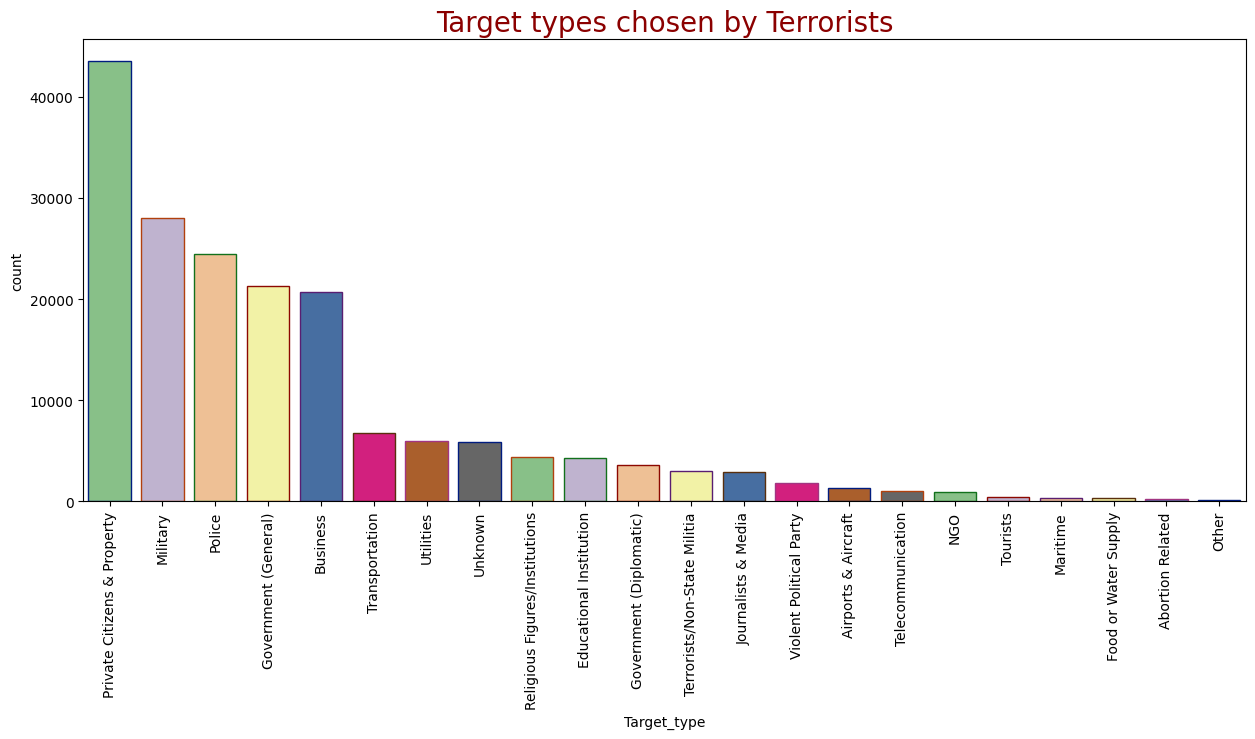

In [ ]:
#Target types chosen by Terrorists
plt.subplots(figsize=(15,6))
sns.countplot(x='Target_type',data=gt_df ,palette='Accent',order=gt_df.Target_type.value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Target types chosen by Terrorists',fontsize=20,color='Darkred')
plt.show()

Observations :

The state of terrorist attacks is critical after 2010. The top five targets of terrorist attacks are citizens, the military, the police, governments, and businesses.

1) The most attacked target is 'Private Citizens & Property' which is approximately 25%.

2) Military, Police, Government and Business are of 10-20% attacked Targets

So, we can say that civilians were the targets most at risk, and their risk index was considerably higher than that of other targets.

# **3) A Perspective of terror attacks in India**

In this analysis we will explore different visualizations of terror attacks in India, like: most affected states, cities & also we will see which terror groups are most prevalent in India. We will see the most favourite targets of terrorists. We will also explore the most favourite attacking methods of terrorists & yearwise attacks starting from 1970 till 2017. At last we will be plotting an interactive visualization of terror attacks by locationwise (Latitude & Longitude) analysis in Indian subcontinent.

In [46]:
#Creating a dataframe with the dataset of India only
gt_india = gt_df[gt_df['Country'] == 'India']
gt_india

,Year,Month,Country,Region,State,City,latitude,longitude,Success,Attacktype,Target_type,natlty1,Gang_name,Weapontype,Kills,Wounds,ishostkid,victims
1186,1972,2,India,South Asia,Delhi,New Delhi,28.585836,77.153336,1,Hijacking,Airports & Aircraft,75.0,Palestinians,Explosives,0.0,0.0,1.0,0.0
2764,1975,1,India,South Asia,Bihar,Samastipur,25.863042,85.781004,1,Bombing/Explosion,Government (General),92.0,Ananda Marga,Explosives,4.0,0.0,0.0,4.0
3857,1976,5,India,South Asia,Delhi,New Delhi,28.585836,77.153336,1,Bombing/Explosion,Airports & Aircraft,92.0,Unknown,Explosives,0.0,0.0,0.0,0.0
5327,1977,9,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,1,Hijacking,Airports & Aircraft,101.0,Japanese Red Army (JRA),Firearms,0.0,0.0,1.0,0.0
7337,1979,1,India,South Asia,Assam,Unknown,26.200605,92.937574,1,Armed Assault,Police,92.0,Naga People,Firearms,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,2017,12,India,South Asia,Kerala,Koothuparamba,11.831902,75.565432,1,Bombing/Explosion,Police,92.0,Unknown,Explosives,0.0,0.0,0.0,0.0
181665,2017,12,India,South Asia,Chhattisgarh,Toylanka,18.802725,81.497666,1,Facility/Infrastructure Attack,Business,92.0,Communist Party of India - Maoist (CPI-Maoist),Firearms,0.0,0.0,0.0,0.0
181672,2017,12,India,South Asia,Jammu and Kashmir,Lethapora,33.966527,74.964225,1,Armed Assault,Police,92.0,Jaish-e-Mohammad (JeM),Explosives,8.0,3.0,0.0,11.0
181684,2017,12,India,South Asia,Assam,Hungrum,25.180162,93.015788,1,Hostage Taking (Kidnapping),Government (General),92.0,Zeliangrong United Front,Firearms,0.0,0.0,1.0,0.0


In [42]:
#Dataframe of Top 10 states in India which were attacked by Terrorists:
indiastate_df = gt_india.groupby("State")['Kills'].count().sort_values(ascending=False).reset_index().head(10)
indiastate_df

,State,Kills
25,Rajasthan,43
26,Andhra pradesh,41
27,Mizoram,27
28,Arunachal Pradesh,24
29,Himachal Pradesh,24
30,Telangana,24
31,Uttaranchal,24
32,Goa,5
33,Sikkim,4
34,Puducherry,2


In [24]:
#Dataframe of Top 10 Cities in India which were attacked by Terrorists:
indiacity_df = gt_india.groupby("City")['Kills'].count().sort_values(ascending=False).reset_index().head(10)
indiacity_df

,City,Kills
0,Srinagar,658
1,Unknown,624
2,Imphal,426
3,New Delhi,157
4,Amritsar,138
5,Sopore,102
6,Ludhiana,77
7,Guwahati,77
8,Anantnag,76
9,Jammu,57


In [21]:
#Dataframe of Top 10 Terrorist groups who killed most citizens
group_df = gt_india.groupby("Gang_name")['Kills'].count().sort_values(ascending=False).reset_index().head(10)
gr_df=group_df.drop(axis=0, index=0)
gr_df

,Gang_name,Kills
1,Communist Party of India - Maoist (CPI-Maoist),1877
2,Maoists,1396
3,Sikh Extremists,710
4,United Liberation Front of Assam (ULFA),357
5,Hizbul Mujahideen (HM),199
6,Lashkar-e-Taiba (LeT),187
7,National Democratic Front of Bodoland (NDFB),174
8,Garo National Liberation Army,166
9,Muslim Separatists,118


In [25]:
#Dataframe of Top 10 most attacked Targets in India
attack_df = gt_india.groupby("Attacktype")['Kills'].count().sort_values(ascending=False).reset_index().head(10)
attack_df

,Attacktype,Kills
0,Bombing/Explosion,4825
1,Armed Assault,3184
2,Assassination,1229
3,Hostage Taking (Kidnapping),1184
4,Facility/Infrastructure Attack,996
5,Unknown,312
6,Unarmed Assault,143
7,Hostage Taking (Barricade Incident),44
8,Hijacking,43


## **3.1 A comprehensive study of most attacked states & cities, notorious terrorist groups and most attacked targets in India.**

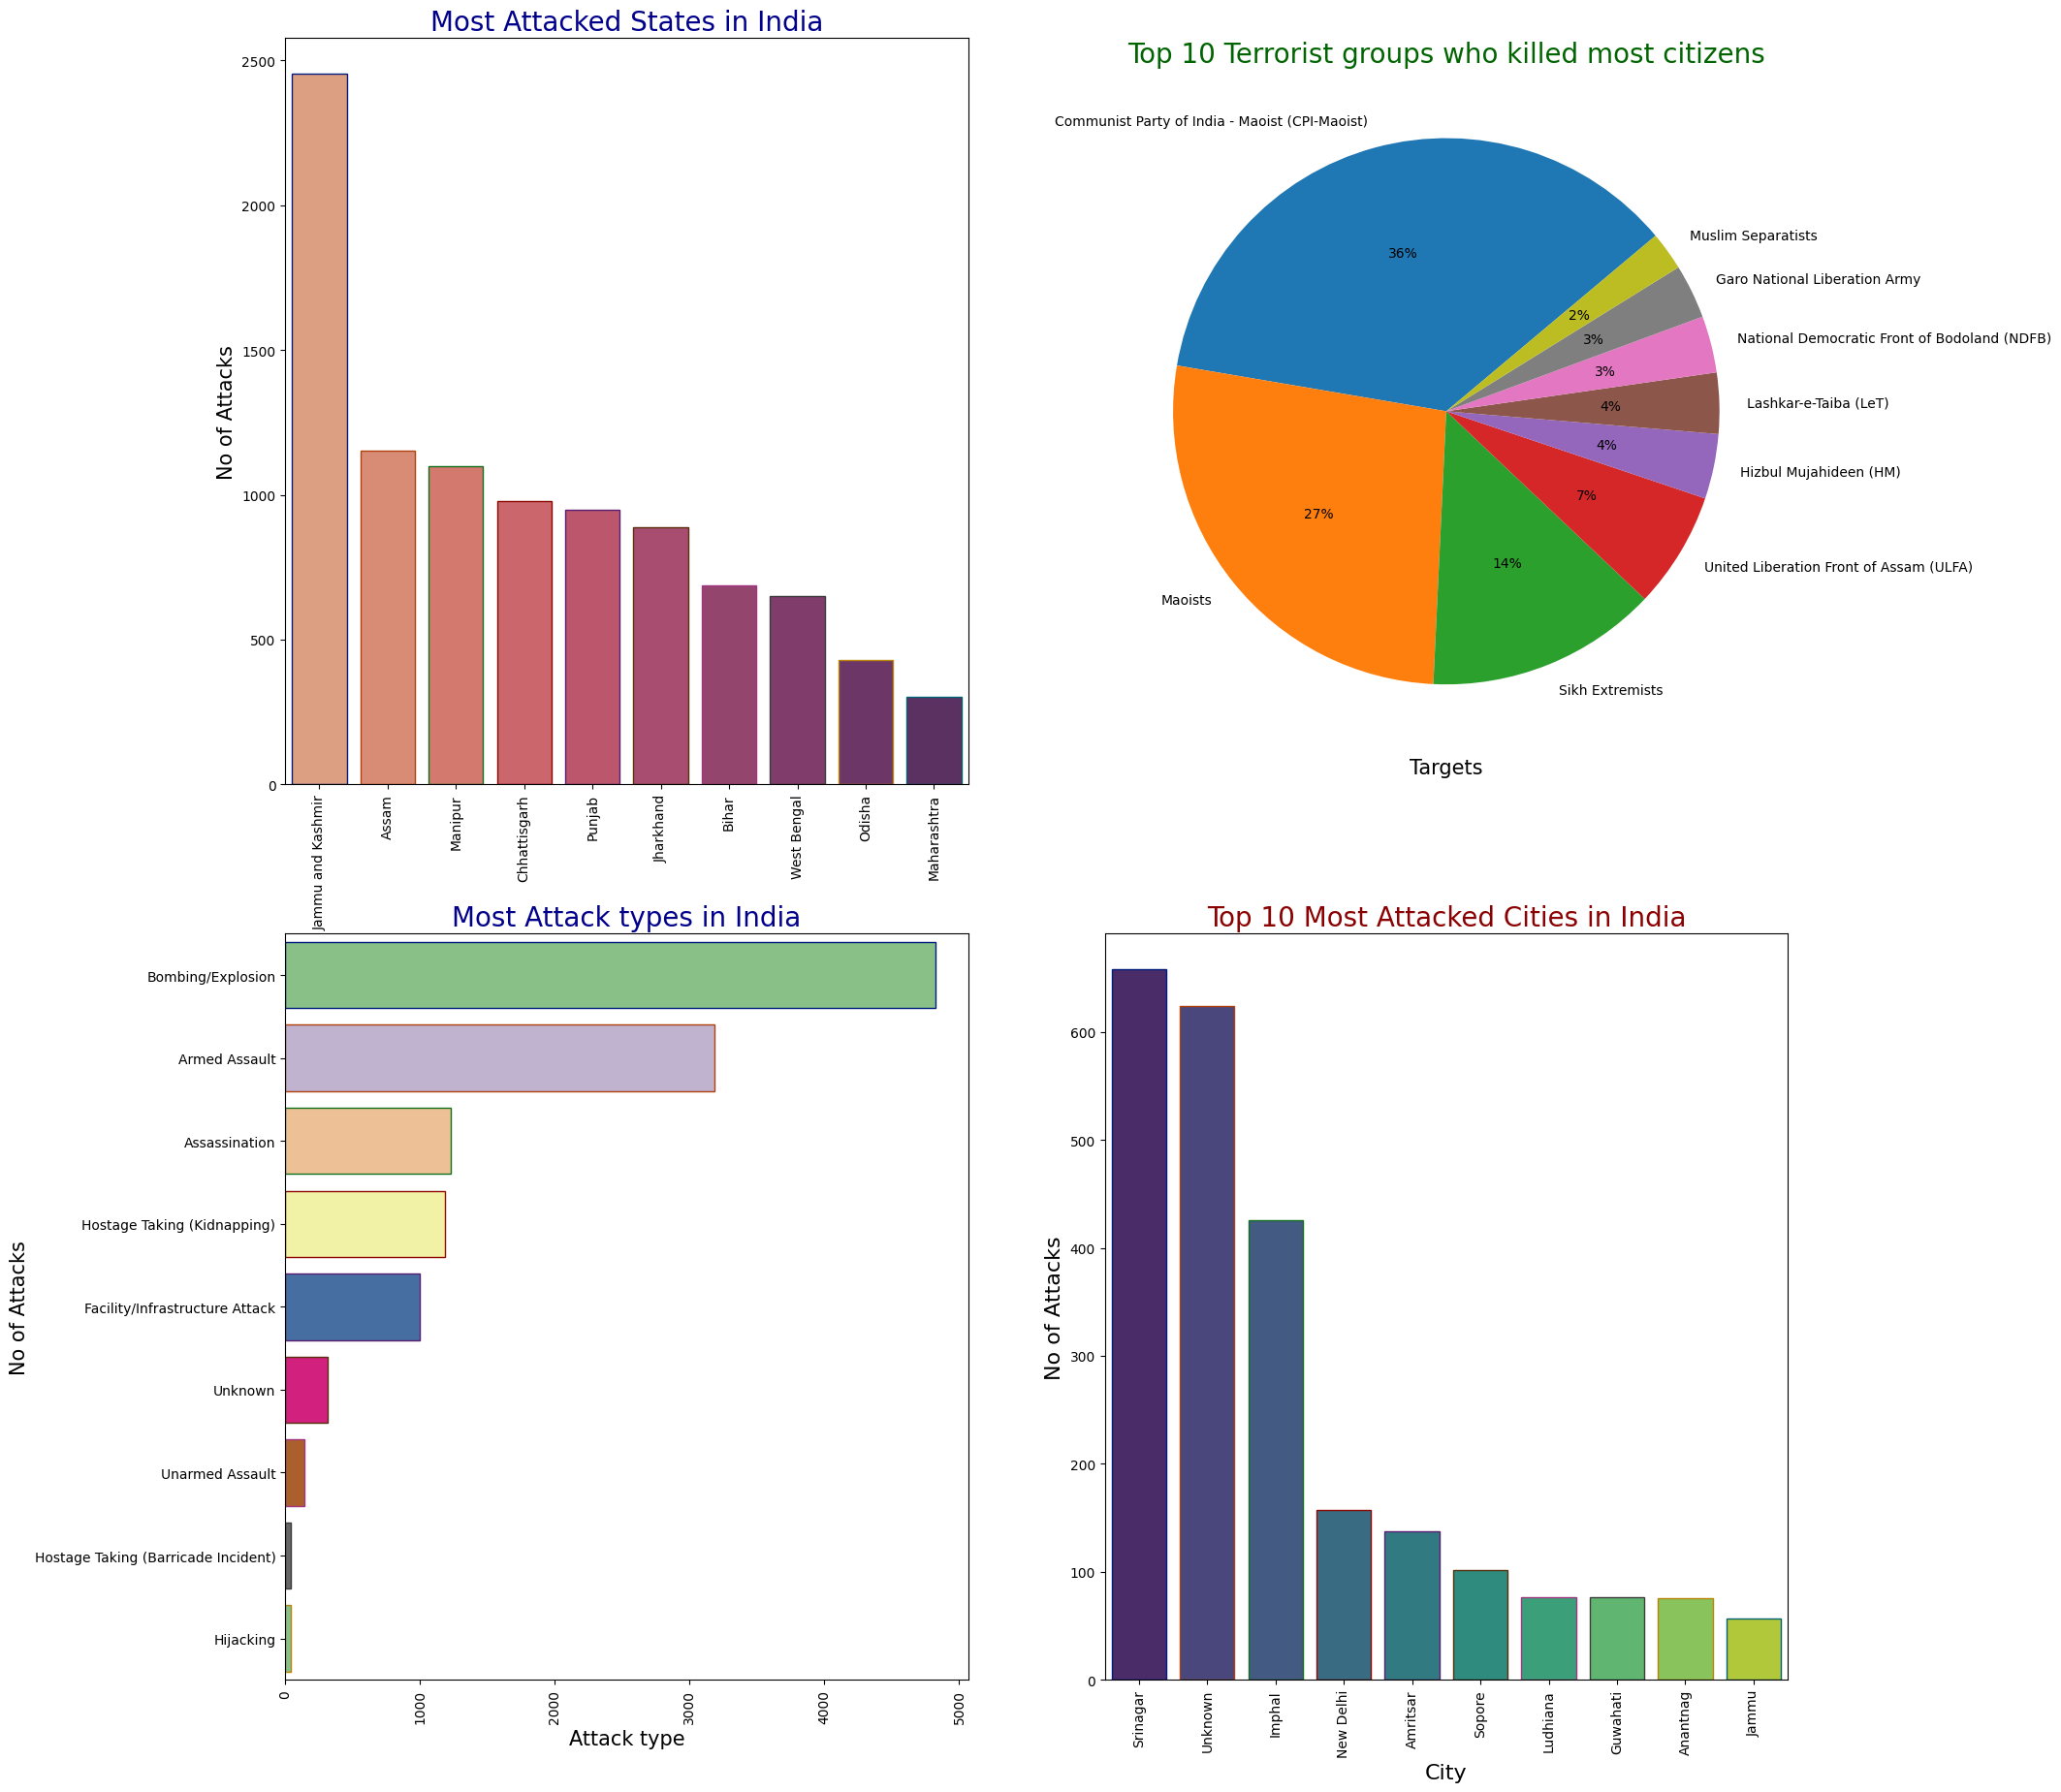

In [41]:
# Top 10 states in India which were attacked by Terrorists:
plt.subplot(2,2,1)
sns.barplot(x=indiastate_df['State'], y=indiastate_df['Kills'],  palette='flare',edgecolor=sns.color_palette('dark',10),orient='v')
plt.title("Most Attacked States in India",fontsize= 20,color='Darkblue')
plt.xlabel('State',fontsize=15)
plt.ylabel('No of Attacks',fontsize = 15)
plt.xticks(rotation=90)


# Top 10 Terrorist groups who killed most citizens:
plt.subplot(2,2,2)
xlabels = gr_df['Gang_name']
ylabels= gr_df['Kills']
plt.pie(ylabels,labels=xlabels,autopct='%.0f%%',startangle=40)
plt.title("Top 10 Terrorist groups who killed most citizens",fontsize=20,color='Darkgreen')
plt.xlabel("Targets",fontsize=15)


#Top 10 most attacked Targets in India
plt.subplot(2,2,3)
sns.barplot(x=attack_df['Kills'], y=attack_df['Attacktype'],  palette='Accent',edgecolor=sns.color_palette('dark',10),orient='h')
plt.title("Most Attack types in India",fontsize=20,color='Darkblue')
plt.xlabel("Attack type",fontsize=15)
plt.ylabel("No of Attacks",fontsize=15)
plt.xticks(rotation=90)


# Top 10 Cities in India which were attacked by Terrorists:
plt.subplot(2,2,4)
sns.barplot(x=indiacity_df['City'], y=indiacity_df['Kills'],  palette='viridis',edgecolor=sns.color_palette('dark',10),orient='v')
plt.title("Top 10 Most Attacked Cities in India",fontsize= 20,color='Darkred')
plt.xlabel('City',fontsize=16)
plt.ylabel('No of Attacks',fontsize = 16)
plt.xticks(rotation=90)

# Set plot size
plt.gcf().set_size_inches(20,22)

# Display plot
plt.show()

## **Observations & inferences:**

1) 'Jammu and Kashmir' is the State with most Terror attacks in India succeeded by 'Assam' & 'Manipur'.

2) Most dangerous terrorist group in India is Communist Party of India-Maoists(CPI-M) followed by Maoists, Sikh_Extremists & ULFA.

3) The terrorists used bombs or explosions as their favourite type of attack succeeded by Armed Assault.

4) 'Srinagar' is the city with most attacks in India followed by 'Imphal' & 'New Delhi'.

## **3.2 Analysis of Year wise Terror attacks stacked on weapons used in India**

In [52]:
#Dataframe of Year wise Terror attacks in India
year_df = gt_india.groupby(['Year','Weapontype'])['Kills'].count().unstack('Weapontype').fillna(0)
year_df

Weapontype,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
Year,,,,,,,,,,
1972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1976,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1977,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1979,0.0,3.0,0.0,13.0,0.0,0.0,0.0,0.0,4.0,0.0
1980,0.0,5.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0
1981,0.0,10.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
1982,0.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0
1983,0.0,26.0,0.0,14.0,0.0,0.0,0.0,0.0,7.0,0.0


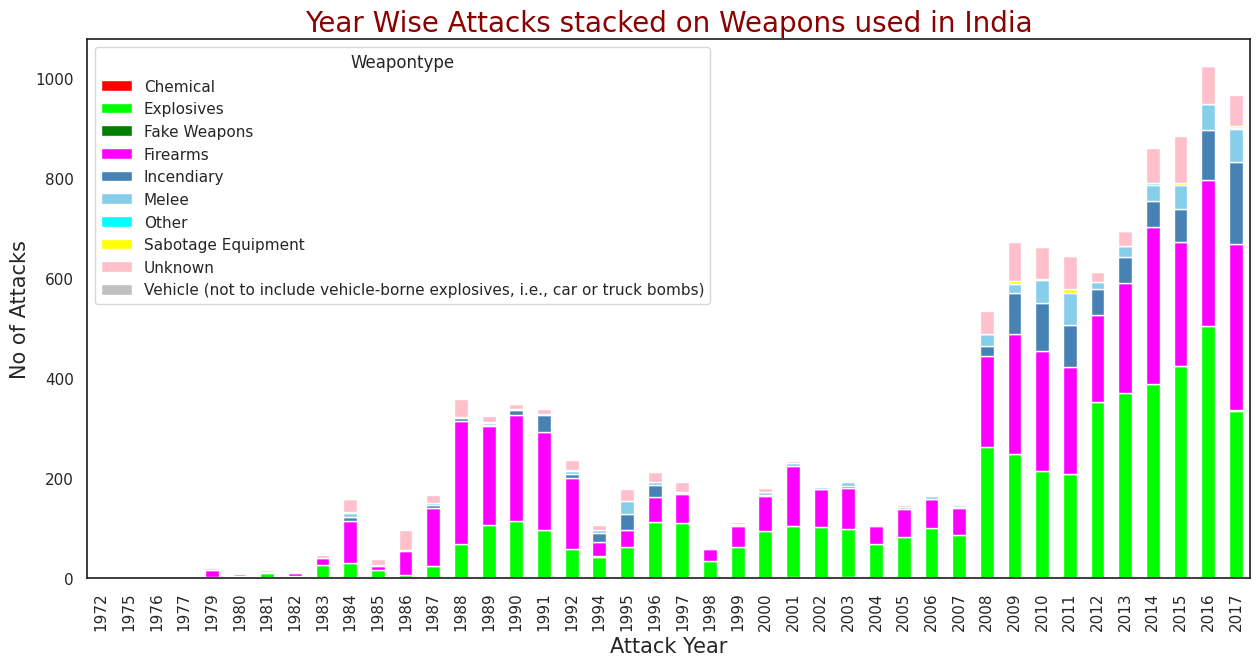

In [67]:
#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
ax = year_df.plot(kind='bar', stacked=True, color=['red', 'lime', 'green', 'fuchsia', 'steelblue','skyblue', 'aqua', 'yellow', 'pink', 'silver'])

#rotate x-axis labels
plt.xticks(rotation=90)

#add axis titles
plt.ylabel('No of Attacks',fontsize= 15)
plt.xlabel("Attack Year",fontsize= 15)

#add overall title
plt.title("Year Wise Attacks stacked on Weapons used in India",fontsize= 20,color='Darkred')

# Set plot size
plt.gcf().set_size_inches(15,7)

#Display the plot
plt.show()

### **Observations & inferences :**

1) In 2016, India has suffered the maximum number of Terrorist attacks.

2) There was no terrorist activities till 1977.

3) A certain spike in terror activities has been seen after the year of 2007.

4) Terrorists used Explosives & Fire Arms mostly to create these attacks.

5) We can also conclude from the stacked bargraph, that the use of Explosives instead of Firearms is increased after 1992.

6) The use of Incendiaries ((of a device or attack) designed to cause fires ) is increased sharply in 2017.

## **3.3 Analysis of Latitude & Longitude of location of Terror Attacks in India**

In [ ]:
# Plotting Latitude & Longitude of location in India
fig = px.scatter_geo(gt_india,lat='latitude',lon='longitude',hover_name="City",color='State',projection='natural earth')
fig.update_layout(title='Terrorist Attacked Regions in India (1970-2017)',title_x=0.5)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=400, margin={"r":0,"t":35,"l":0,"b":0})
fig.show()

### **Observations & inferences :**

This is an interactive plotting of latitude & longitude locations of terror activities in India. 

1) We can see the specific locations of terror attacks & how densely populated they are in the states of -- Jammu and Kashmir, Assam, Manipur, Chhattisgarh, Punjab, Jharkhand, Bihar, West Bengal, Odisha & Maharashtra. 

2) We can also see that the minimum number of terror attacks happened in the states of -- Puducherry, Goa, Uttarakhand etc.
